In [1]:
"""
Example implementations of HARK.ConsumptionSaving.ConsPortfolioHousingModel
"""
from time import time

import matplotlib.pyplot as plt
import numpy as np

from HARK.ConsumptionSaving.ConsPortfolioHousingModel import (
    PortfolioRentalHousingType,
)
from HARK.utilities import plot_funcs

In [2]:
# Make and solve an example portfolio choice consumer type
print("Now solving an example portfolio choice problem; this might take a moment...")
MyType = PortfolioRentalHousingType()
MyType.cycles = 0
t0 = time()
MyType.solve()
t1 = time()
MyType.xFunc = [MyType.solution[t].xFunc for t in range(MyType.T_cycle)]
MyType.cFunc = [MyType.solution[t].cFunc for t in range(MyType.T_cycle)]
MyType.hFunc = [MyType.solution[t].hFunc for t in range(MyType.T_cycle)]
MyType.shareFunc = [MyType.solution[t].ShareFuncAdj for t in range(MyType.T_cycle)]
print(
    "Solving an infinite horizon portfolio choice problem took "
    + str(t1 - t0)
    + " seconds."
)

Now solving an example portfolio choice problem; this might take a moment...
Solving an infinite horizon portfolio choice problem took 11.253005027770996 seconds.


Consumption and housing functions over market resources:


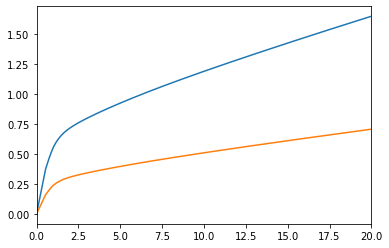

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


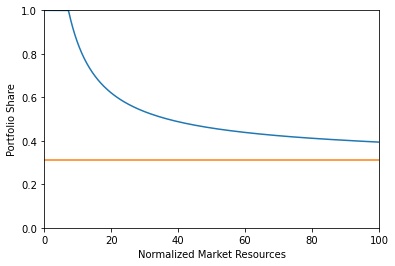

In [3]:
# Plot the consumption and risky-share functions
print("Consumption and housing functions over market resources:")
plot_funcs([MyType.cFunc[0], MyType.hFunc[0]], 0.0, 20.0)
print("Risky asset share as a function of market resources:")
print("Optimal (blue) versus Theoretical Limit (orange)")
plt.xlabel("Normalized Market Resources")
plt.ylabel("Portfolio Share")
plt.ylim(0.0, 1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plot_funcs(
    [
        MyType.shareFunc[0],
        lambda m: MyType.ShareLimit * np.ones_like(m),
    ],
    0.0,
    100,
)

Savings function over market resources:


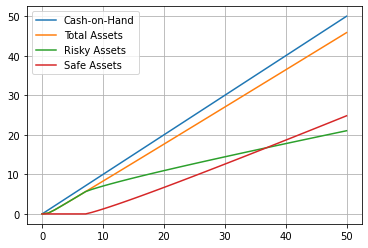

In [4]:

# Plot the savings
print("Savings function over market resources:")
mgrid = np.linspace(0, 50)
xgrid = MyType.xFunc[0](mgrid)
agrid = mgrid - xgrid
riskyshare = MyType.shareFunc[0](mgrid)
riskyasset = agrid * riskyshare
safeasset = agrid * (1 - riskyshare)
plt.plot(mgrid, mgrid, label="Cash-on-Hand")
plt.plot(mgrid, agrid, label="Total Assets")
plt.plot(mgrid, riskyasset, label="Risky Assets")
plt.plot(mgrid, safeasset, label="Safe Assets")
plt.legend()
plt.grid()

Non-participation from low cash-on-hand agents.


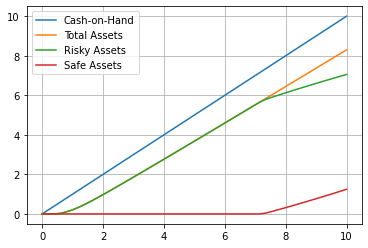

In [5]:
# Plot the savings
print("Non-participation from low cash-on-hand agents.")
mgrid = np.linspace(0, 10)
xgrid = MyType.xFunc[0](mgrid)
agrid = mgrid - xgrid
riskyshare = MyType.shareFunc[0](mgrid)
riskyasset = agrid * riskyshare
safeasset = agrid * (1 - riskyshare)
plt.plot(mgrid, mgrid, label="Cash-on-Hand")
plt.plot(mgrid, agrid, label="Total Assets")
plt.plot(mgrid, riskyasset, label="Risky Assets")
plt.plot(mgrid, safeasset, label="Safe Assets")
plt.legend()
plt.grid()